<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas:" data-toc-modified-id="Ideas:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas:</a></span></li><li><span><a href="#import-libraries" data-toc-modified-id="import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import libraries</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare data</a></span><ul class="toc-item"><li><span><a href="#First-look-at-correlation" data-toc-modified-id="First-look-at-correlation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>First look at correlation</a></span></li><li><span><a href="#VIS" data-toc-modified-id="VIS-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>VIS</a></span></li><li><span><a href="#CIG,-CLDHT" data-toc-modified-id="CIG,-CLDHT-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CIG, CLDHT</a></span></li><li><span><a href="#Temperature-(TMP)-and-RH" data-toc-modified-id="Temperature-(TMP)-and-RH-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Temperature (TMP) and RH</a></span></li><li><span><a href="#Wind-direction" data-toc-modified-id="Wind-direction-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Wind direction</a></span></li><li><span><a href="#Wind-speeds" data-toc-modified-id="Wind-speeds-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Wind speeds</a></span></li></ul></li><li><span><a href="#Concluding-notes" data-toc-modified-id="Concluding-notes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Concluding notes</a></span></li></ul></div>

# Ideas:

- We will pick up the cleaned meteorological file from the previous exercise. If you missed that exercise, in which I went through step-by-step getting and cleaning files from NOAA, then visit file 2.2 and part 1. The cleaned file is in `data/cleaned_noibai_noaa_isd_2018.csv`
- We will resume to archieved data from `airnow.gov`. This file was cleaned up and reduced to the only PM<sub>2.5</sub> concentration (and thus all metadata was filtered out). The file is here `data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv`. I did a quick data wrangling in part 2.1
- Correlating meteorological parameters with observed PM<sub>2.5</sub> is *better than a guessing game* as we try to make some connection between two sets of data (with the same timestamp).

# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime

In [2]:
# use simple style with font and tick setup
plt.style.use('seaborn-white')

In [3]:
plt.rcParams['figure.figsize'] =  (8,6)
plt.rcParams['font.sans-serif'] = 'Open Sans'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#4c4c4c'
plt.rcParams['axes.labelcolor']= '#4c4c4c'
plt.rcParams['xtick.color'] = '#4c4c4c'
plt.rcParams['ytick.color'] = '#4c4c4c'
plt.rcParams['font.size']=12

# Prepare data

In [4]:
# load meteorological data
dfm = pd.read_csv('data/cleaned_noibai_noaa_isd_2018.csv',
                 parse_dates=['DATE'],
                 index_col=['DATE'])
dfm.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT
DATE,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0


In [5]:
# the interval of file above is 30 minutes each, and PM2.5 is one hour a part
dfm = dfm.resample('1H', loffset=datetime.timedelta(hours=1)).mean()

In [6]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Freq: H
Data columns (total 8 columns):
CIG      5951 non-null float64
VIS      8524 non-null float64
TMP      8524 non-null float64
DEW      8524 non-null float64
WD       8524 non-null float64
WS       8524 non-null float64
CLDCR    6200 non-null float64
CLDHT    6200 non-null float64
dtypes: float64(8)
memory usage: 615.9 KB


In [7]:
# and now is for PM2.5
pm25 = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv', 
                   parse_dates=['Date (LT)'],
                   index_col=['Date (LT)'])

pm25.head()

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2
2018-01-01 04:00:00,97.6
2018-01-01 05:00:00,89.1


In [8]:
# one year has 8760 hours
pm25.shape

(8190, 1)

In [9]:
# now we combine to data frame, using the index as the shared key
df = pd.merge(dfm, pm25, left_index=True, right_index=True)
df.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,pm25
2018-01-01 01:00:00,1021.0,8000.0,16.0,12.0,70.0,1.50,0.7,1021.0,69.2
2018-01-01 02:00:00,975.0,7000.0,16.5,12.0,70.0,1.80,0.7,975.0,75.5
2018-01-01 03:00:00,1006.0,7000.0,17.0,12.0,80.0,2.85,0.4,762.0,90.2
2018-01-01 04:00:00,1006.0,6000.0,17.0,12.0,40.0,2.10,0.4,762.0,97.6
2018-01-01 05:00:00,1006.0,5000.0,18.5,13.0,65.0,1.50,0.4,762.0,89.1


In [10]:
df.index.rename('DATE', inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8190 entries, 2018-01-01 01:00:00 to 2019-01-01 00:00:00
Data columns (total 9 columns):
CIG      5604 non-null float64
VIS      7959 non-null float64
TMP      7959 non-null float64
DEW      7959 non-null float64
WD       7959 non-null float64
WS       7959 non-null float64
CLDCR    5815 non-null float64
CLDHT    5815 non-null float64
pm25     8190 non-null float64
dtypes: float64(9)
memory usage: 639.8 KB


**wait, are we losing data?**

- check again with `dfm`, we have over 8500 lines, and now in combined dataframe, the file has 7959 rows
- the combine option by default is **inner**, a **union** of two sets of index, other options also available which are `left`, `right`, `outer`, and assign the option by `pd.merge(df1, df2, how='outer', ...)`

In [12]:
# we will calculate RH from approximation from air tempeature and dewpoint temperature
df['RH'] = df.apply(lambda row: 100-5*(row['TMP']-row['DEW']), axis=1)
df.head(3)

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,pm25,RH
DATE,,,,,,,,,,
2018-01-01 01:00:00,1021.0,8000.0,16.0,12.0,70.0,1.50,0.7,1021.0,69.2,80.0
2018-01-01 02:00:00,975.0,7000.0,16.5,12.0,70.0,1.80,0.7,975.0,75.5,77.5
2018-01-01 03:00:00,1006.0,7000.0,17.0,12.0,80.0,2.85,0.4,762.0,90.2,75.0


In [13]:
# and we save the file 
df.to_csv('data/combined_meteo_PM2.5_Hanoi_2018.csv')

In [14]:
df = pd.read_csv('data/combined_meteo_PM2.5_Hanoi_2018.csv', 
                 parse_dates=['DATE'],
                 index_col=['DATE'])

In [15]:
# let get correlation which generate a dataframe
df.corr()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,pm25,RH
CIG,1.000000,0.301060,0.060859,-0.013038,0.130481,-0.032222,-0.195803,0.221168,0.084939,-0.134297
VIS,0.301060,1.000000,0.038549,-0.242069,0.028815,0.014172,-0.142735,0.150400,-0.037716,-0.476898
TMP,0.060859,0.038549,1.000000,0.819125,0.079949,0.004359,-0.272067,0.142463,-0.297633,-0.164482
DEW,-0.013038,-0.242069,0.819125,1.000000,0.031270,-0.005788,-0.273422,-0.196228,-0.362755,0.431071
WD,0.130481,0.028815,0.079949,0.031270,1.000000,0.014538,-0.040801,0.088947,0.134051,-0.071991
WS,-0.032222,0.014172,0.004359,-0.005788,0.014538,1.000000,0.015695,0.013199,-0.027791,-0.016809
CLDCR,-0.195803,-0.142735,-0.272067,-0.273422,-0.040801,0.015695,1.000000,0.125950,0.139204,0.005551
CLDHT,0.221168,0.150400,0.142463,-0.196228,0.088947,0.013199,0.125950,1.000000,0.032396,-0.570603
pm25,0.084939,-0.037716,-0.297633,-0.362755,0.134051,-0.027791,0.139204,0.032396,1.000000,-0.155600
RH,-0.134297,-0.476898,-0.164482,0.431071,-0.071991,-0.016809,0.005551,-0.570603,-0.155600,1.000000


- that is easy and **meaningless** as well. One goal of data visualization is to drill down the data and get a simpler, much simpler message from the data. **Meaningless** is for an emphasis. When we are overwhelmed with data, we loss interest of it, and nothing would be retained.

and more note, before we jump in with the analysis, there are plenty reviews the correlation of PM<sub>2.5</sub> with meterological parameters. The effects are mixed and the change of concentration is both way. The diagram belows are taken from a recent study.

![PM2.5](./img/chen_pm25_meteo.png)

Source: [Chen, at el., 2020](https://doi.org/10.1016/j.envint.2020.105558)

## First look at correlation

- with `pandas`, getting a bivariate correlation (correlation between two variables) is easy, just call `.corr()` after the DataFrame like this. We can filter out the correlation with one variable such as `pm25`

In [16]:
df.corr()['pm25']

CIG      0.084939
VIS     -0.037716
TMP     -0.297633
DEW     -0.362755
WD       0.134051
WS      -0.027791
CLDCR    0.139204
CLDHT    0.032396
pm25     1.000000
RH      -0.155600
Name: pm25, dtype: float64

**OK, that is quick and easy, but how this number mean?**

- First take a look at this diagram about
![Pearson correlation](https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg
 "Pearson bivariate correlation")

- A value of 1 is show the strongest positive correlation. Positive means when the value of one variable increases, the other also increases. The correlation of `pm25` to `pm25` (PM<sub>2.5</sub> concentration) is 1, which is always the case.
- A value of -1 show the strongest nagative correlation. Negative means when the value of one variable increases, the other decreases or vice versa.
- A value of 0 show no correlation.
- Anything in between are described as **weak**, **moderate**, **high** correlation. The degree to just is a dependent to the area of study. For the study involves a real environment (as oppose to well-controlled environmnet, simulated environmnet), the correlation is expected the weaker than those in well-defined environment.

- let visualize the table above, using the built-in plot function, we have two options `plot.bar()` and `plot.barh()`

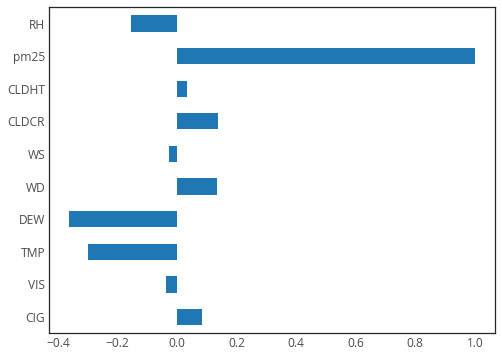

In [17]:
df.corr()['pm25'].plot.barh()

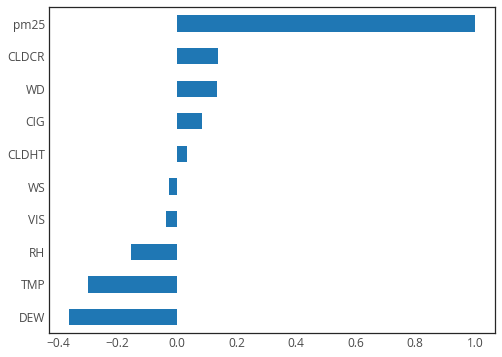

In [18]:
# rearange the value
df.corr()['pm25'].sort_values().plot.barh()

and voila, it is done.
- there is no meteorological parameter in a **strong** correlation with PM<sub>2.5</sub>. To judge a correlation number in **strong** category has to depends on a specific area of investigation but the value usually 0.7 or above.
- and not even in the area of **moderate to highly** band. So if the goal is the find a definitive correlation between observed meteorological inputs with concentration of PM<sub>2.5</sub>, then the journey ended here, unfruitfully.

<div style='border: solid maroon 2px'></div>

- but if you live in (seasonally) polluted area with aerosol fills the air in the winter, then it becomes something else: curiosity, practical knowledge, and service to others to feather out something interesting
- and on that ground, let move on the figure out what else in this correlation mess

**Let refesh what the abbreviation mean?**

- RH is relative humidity, the fraction of the current humidity to the saturated humidity that a volume of air can hold at that temperature
- CLDHT: The height of the lower cloud (in meters) relative to a reference point called *VERTICAL-REFERENCE-DATUM*
- CLDCR: Cloud cover in fraction
- WS, WD: windspeed (in meter per second), and degree with zero (or 360) is the wind comming from the north
- DEW: dewpoint temperature
- TMP: air temperature
- VIS: visiblity measured by the horizontal distance at which an object can be identified
- CIG: The height above ground level (AGL) of the lowest cloud

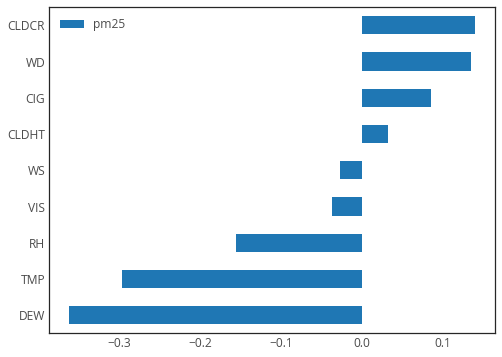

In [19]:
# let make a few operation in place
df.corr()['pm25'].sort_values().to_frame().drop(['pm25']).plot.barh()

** let unpack the operations here**

1. take correlation on `DataFrame df`, and filter out the column for `pm25` (or PM<sub>2.5</sub>)
2. sort the value of the correlation coefficients using `sort_values()`
3. turn a `Pandas Series` to a `DataFrame`, so that we can use the `drop()` function to drop the redundancy value of `pm25`
4. finally, the number was plot using horizontal bar chart

In [20]:
label = ['Cloud Cover', 'Wind Direction', 'Height Above Ground',
                    'Cloud Height', 'Wind Speed', 'Visibility', 'Relative Humidity',
         'Air Temperature', 'Dewpoint Temperature']

In [21]:
label

['Cloud Cover',
 'Wind Direction',
 'Height Above Ground',
 'Cloud Height',
 'Wind Speed',
 'Visibility',
 'Relative Humidity',
 'Air Temperature',
 'Dewpoint Temperature']

In [22]:
labels = list(reversed(label))

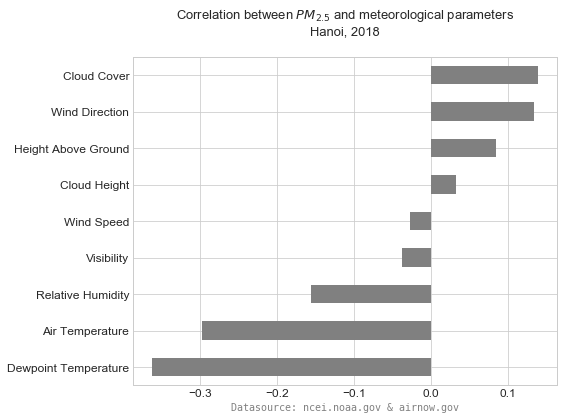

In [23]:
# let make the graph with bell and whistle
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
df.corr()['pm25'].sort_values().to_frame().drop(['pm25']).plot.barh(ax=ax, color='gray')
ax.set_title('Correlation between $PM_{2.5}$ and meteorological parameters\nHanoi, 2018',y=1.05, fontsize=13)
ax.get_legend().remove()
ax.set_yticklabels(labels)
ax.set_xlabel('Datasource: ncei.noaa.gov & airnow.gov',
              fontsize=10, color='gray', fontfamily='monospace')
fig.tight_layout()
fig.savefig('img/2020Jul_corr_pm25.png')

## VIS
- Visiblity seems to be a good candidate to start, and it makes sense. Hazy and foggy days in Hanoi are often been observed with a high PM<sub>2.5</sub> concentration
- Noticed that correlation between visiblity and PM<sub>2.5</sub> is almost None

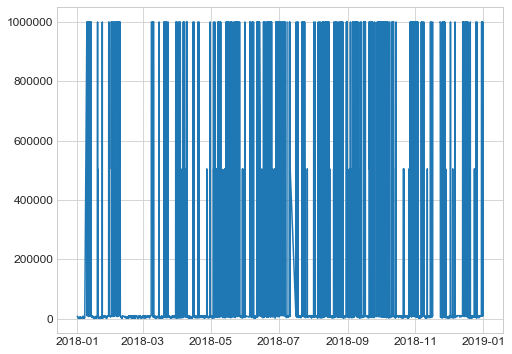

In [24]:
# pretty noisy
plt.plot(df.index, df.VIS)

In [25]:
# most of data showing a good visibility, but I did not clean up the file all the way, the 9999 value for missing still in place
df.VIS.describe()

count      7959.000000
mean     179714.442329
std      359655.706573
min         625.000000
25%        5500.000000
50%        9000.000000
75%        9999.000000
max      999999.000000
Name: VIS, dtype: float64

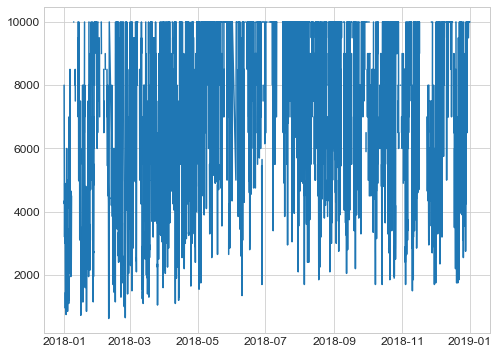

In [26]:
# setting all missing value, and max value as None
df.loc[df.VIS >=220000, 'VIS'] = None
plt.plot(df.index, df.VIS)

In [27]:
df.VIS.describe()

count    6380.000000
mean     7216.806740
std      2672.672141
min       625.000000
25%      5000.000000
50%      7500.000000
75%      9999.000000
max      9999.000000
Name: VIS, dtype: float64

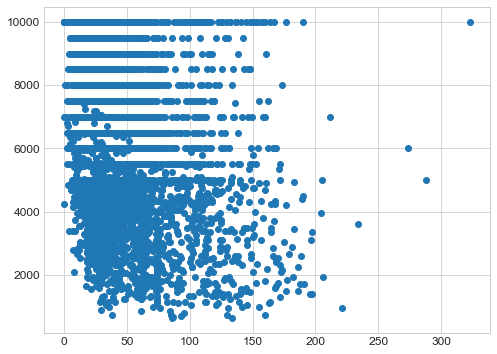

In [28]:
# still not clear pattern though we have more point on the lower left corner
plt.scatter(df.pm25, df.VIS)

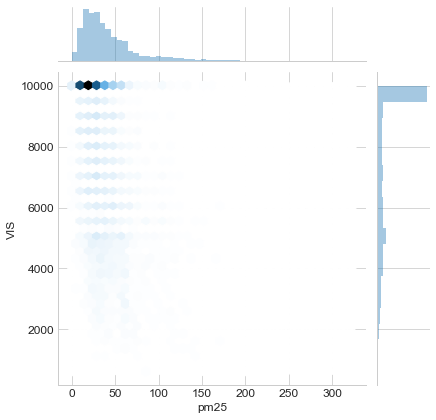

In [29]:
sns.jointplot(df.pm25, df.VIS, kind='hex')

In [30]:
dft = df.query('VIS <=5000')

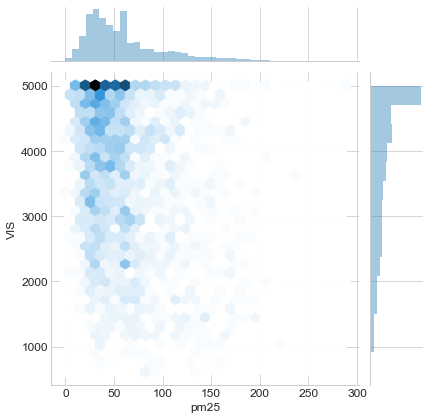

In [31]:
# with even subset data with lower visibility, 
sns.jointplot(dft.pm25, dft.VIS, kind='hex')

In [32]:
df.corr()['pm25']['VIS']

-0.4127430609698673

In [33]:
df['h'] = df.index.hour
df['m'] = df.index.month

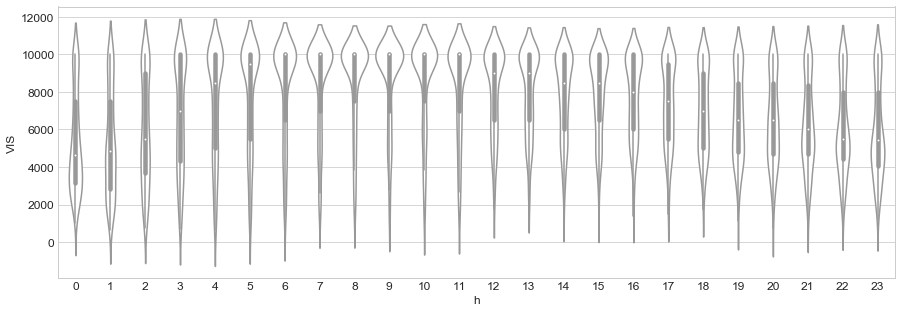

In [34]:
# ok, VIS seems depended on the hour, lower during the night
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='h', y='VIS', color='white')

In [35]:
# let look for a month

In [36]:
feb = df.query('m==2')

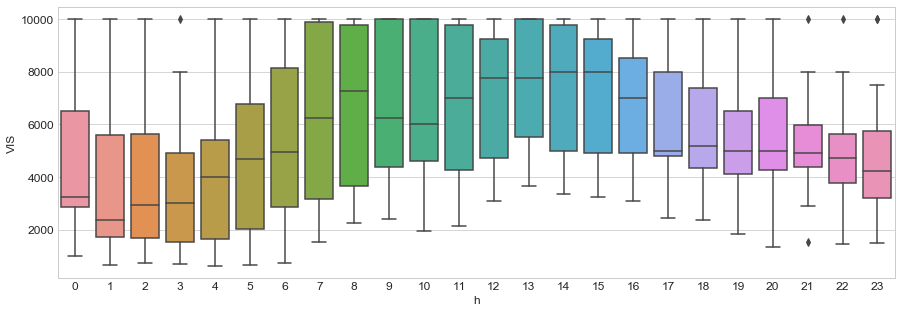

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(data=feb, x='h', y='VIS')

In [38]:
jun = df.query('m==6')

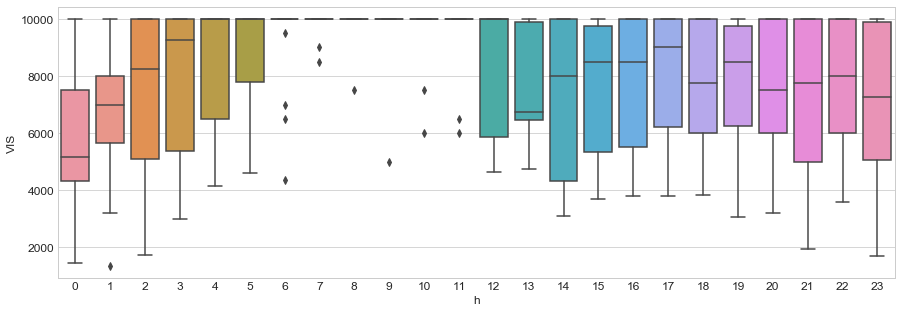

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(data=jun, x='h', y='VIS')

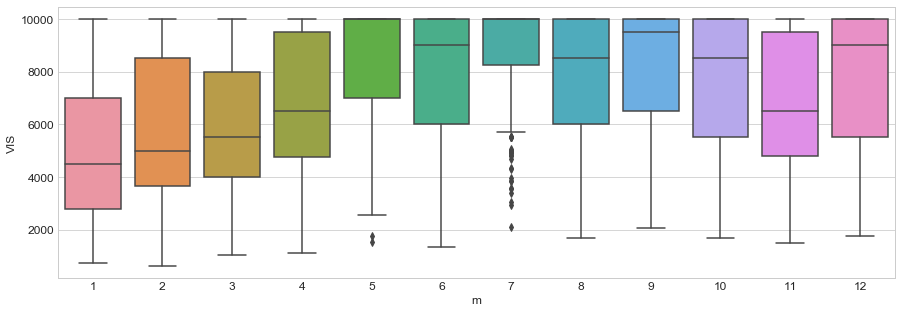

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='m', y='VIS')

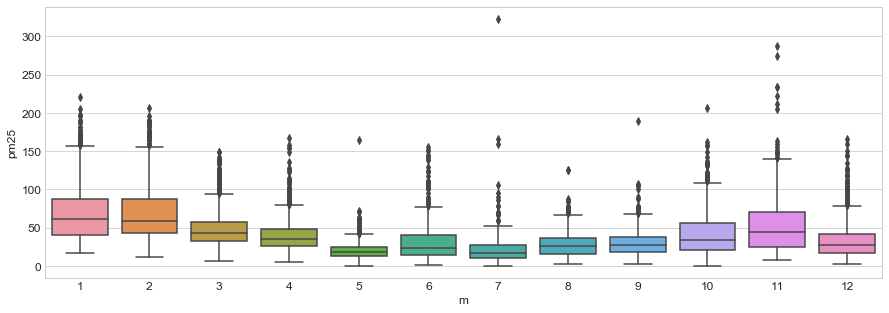

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='m', y='pm25')

In [42]:
dft = df.groupby('m').mean()

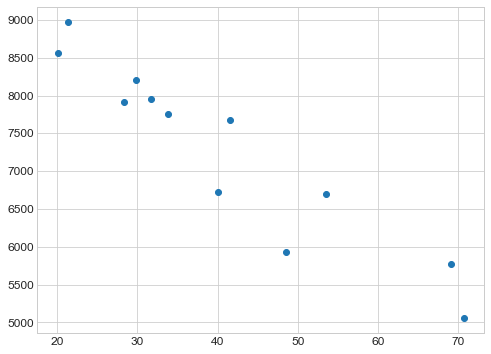

In [43]:
plt.scatter(dft.pm25, dft.VIS)

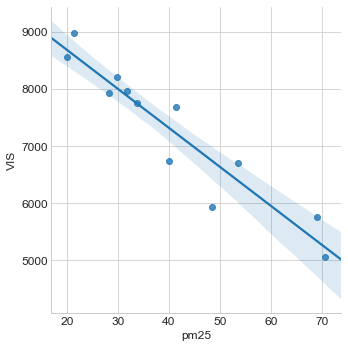

In [44]:
sns.lmplot(x='pm25', y='VIS', data=dft)

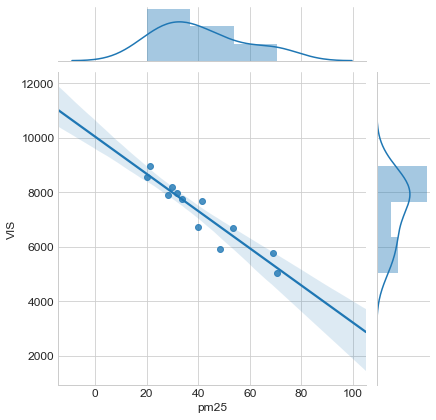

In [45]:
sns.jointplot(x='pm25', y='VIS', data=dft, kind="reg", )

In [46]:
# this is impressive, sudently, the correlation of the average concentration (by month) is strong, or very strong
dft.corr()['pm25']['VIS']

-0.9445724331666244

In [47]:
dft = df.groupby('h').mean()

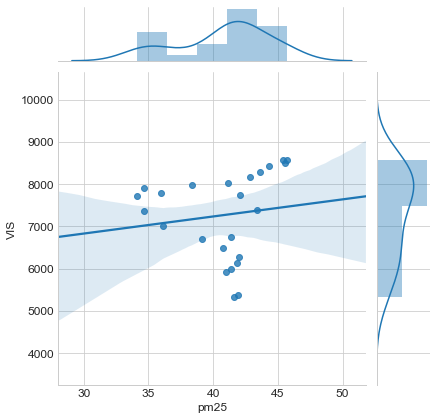

In [48]:
sns.jointplot(x='pm25', y='VIS', data=dft, kind="reg", )

In [49]:
# or not so, if we averaged the input by the hour
dft.corr()['pm25']['VIS']

0.13620802167369214

In [50]:
# let try to explore more
dft = df[(df['h'] >=7) & (df['h'] <=17)]

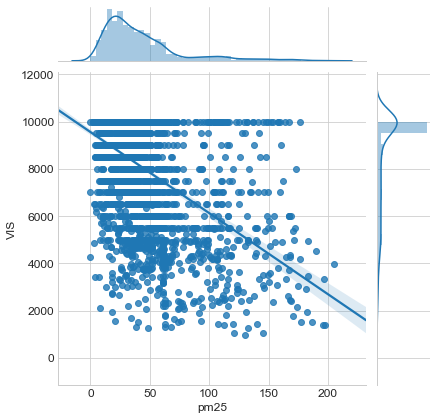

In [51]:
sns.jointplot(x='pm25', y='VIS', data=dft, kind="reg", )

In [52]:
dft6 = dft.query('VIS<=6000')

In [53]:
# this the correlation daily hour 
dft.corr()['pm25']['VIS']

-0.49590702697163747

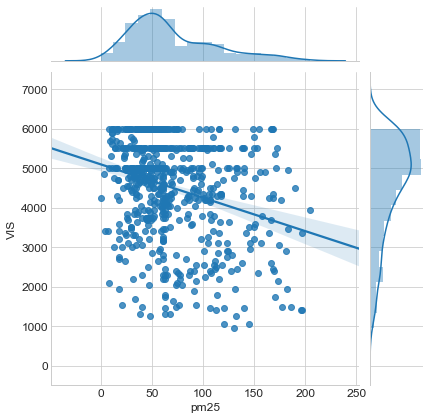

In [54]:
sns.jointplot(x='pm25', y='VIS', data=dft6, kind="reg", )

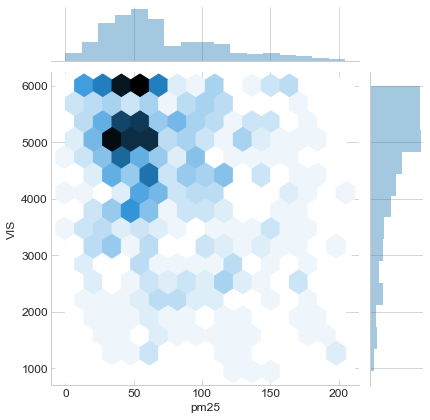

In [55]:
sns.jointplot(x='pm25', y='VIS', data=dft6, kind="hex", )

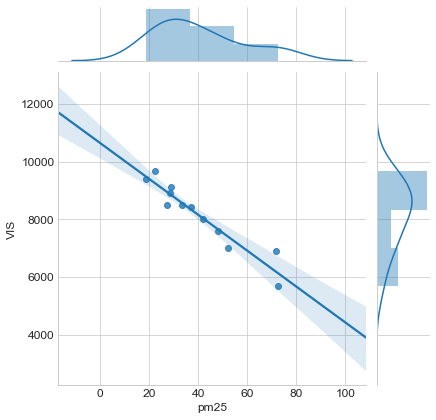

In [56]:
dft = dft.groupby('m').mean()
sns.jointplot(x='pm25', y='VIS', data=dft, kind="reg", )

In [57]:
# the correlation is strong with daily hours
dft.corr()['pm25']['VIS']

-0.9549564104816615

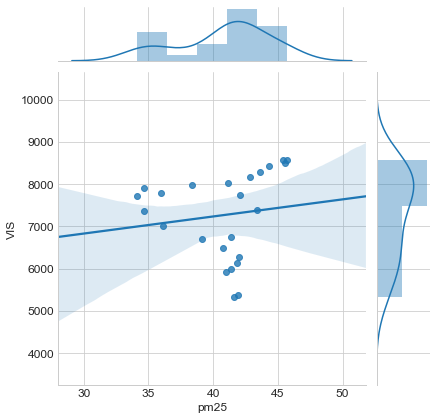

In [58]:
dft1 = df.groupby('h').mean()
sns.jointplot(x='pm25', y='VIS', data=dft1, kind="reg", )

In [59]:
# grouping by the hour with day hour
dft1.corr()['pm25']['VIS']

0.13620802167369214

-0.22306622063006426


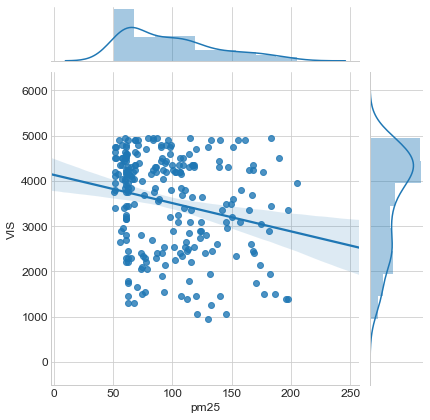

In [60]:
# let try to explore even more
dft = df[(df['h'] >=7) & (df['h'] <=17) & (df['pm25'] > 50) & (df['VIS'] < 5000)]
sns.jointplot(x='pm25', y='VIS', data=dft, kind="reg", )
print(dft.corr()['pm25']['VIS'])

- the analysis can misled by incidently making a gross estimation
- when in doubt, make sure to run through key combination to make sure we know the underlying artifact
- low visiblity is often observed with a high PM<sub>2.5</sub>, but from this set of data, opposite conclusion can be drawn

## CIG, CLDHT

In [61]:
# we can get correlation to other variable like this
# in the previous section, we look for horizontal direction, now we turn to vertical direction
df.corr()['CIG']

CIG      1.000000
VIS     -0.085522
TMP      0.060859
DEW     -0.013038
WD       0.130481
WS      -0.032222
CLDCR   -0.195803
CLDHT    0.221168
pm25     0.084939
RH      -0.134297
h        0.143417
m        0.177284
Name: CIG, dtype: float64

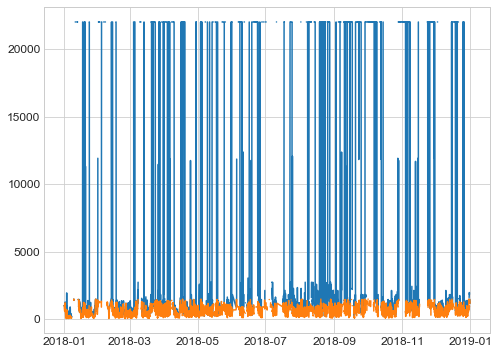

In [62]:
plt.plot(df.index, df.CIG)
plt.plot(df.index, df.CLDHT)

In [63]:
df.CLDHT.describe()

count    5815.000000
mean      616.896303
std       345.892369
min        61.000000
25%       305.000000
50%       564.000000
75%       884.000000
max      1494.000000
Name: CLDHT, dtype: float64

In [64]:
df.CIG.describe()

count     5604.000000
mean      5181.372234
std       8437.395829
min         91.000000
25%        610.000000
50%       1006.000000
75%       1676.000000
max      22000.000000
Name: CIG, dtype: float64

In [65]:
# 22000 (in meter) is for clear sky, let ignore it by setting to zero
df.loc[df.CIG ==22000, 'CIG'] = None

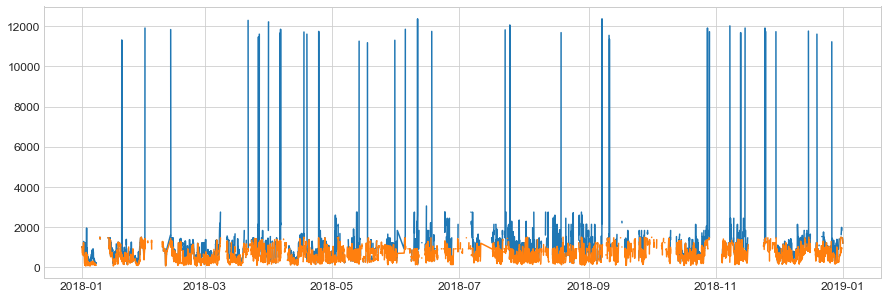

In [66]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df.CIG)
plt.plot(df.index, df.CLDHT)

- now it look better together, both CIG and CLDHT are to height to the lowest cloud level

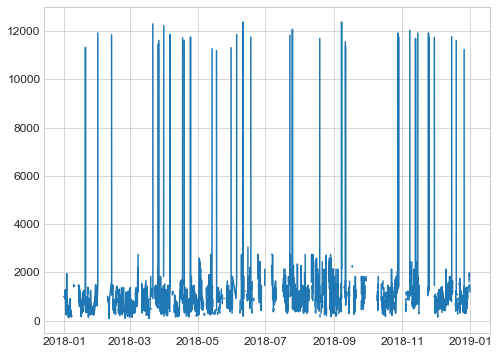

In [67]:
plt.plot(df.index, df.CIG)
# plt.plot(df.index, df.CLDHT)


In [68]:
df.CIG.describe()

count     4492.000000
mean      1017.900712
std       1199.512723
min         91.000000
25%        563.875000
50%        868.500000
75%       1219.000000
max      12371.500000
Name: CIG, dtype: float64

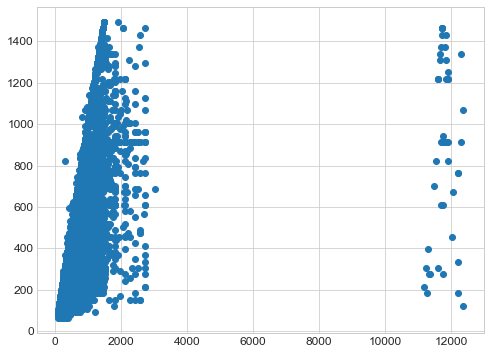

In [69]:
plt.scatter(df.CIG, df.CLDHT)

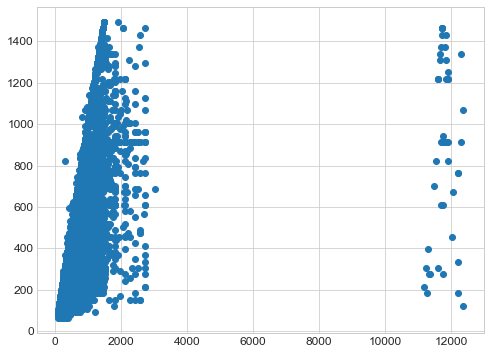

In [70]:
dft = df.query('CIG<=5000')
plt.scatter(df.CIG, df.CLDHT)

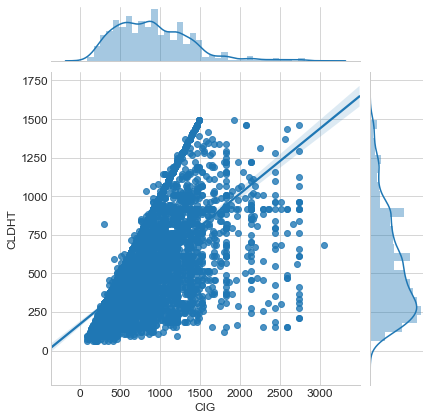

In [71]:
sns.jointplot(dft.CIG, dft.CLDHT, kind='reg')

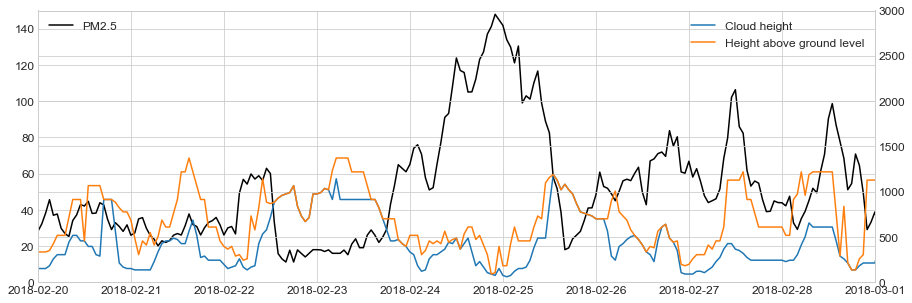

In [72]:
# VIS is horizontal distance to the identifiable object
# CIG, CLDHT is the height (vertical distance) to ground of a reference point to the lowest cloud
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlim(datetime.datetime(2018,2,20), datetime.datetime(2018,3,1))

ax.plot(df.index, df.pm25, color='black', label='PM2.5')
ax.set_ylim(0, 150)

ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(df.index, df.CLDHT, label='Cloud height')
ax2.plot(df.index, df.CIG, label='Height above ground level')
ax2.set_ylim(0, 3000)
ax2.legend()

**let review**
- look like we capture a good window showing the reverse relationship between PM<sub>2.5</sub> concentration with the height of the lowest cloud
- a thin layer between ground and the cloud is one indicator of poor mixing or a stable layer. So in this condition, the PM<sub>2.5</sub> formed near the ground being kept there
- a consistent high concentration above 50 microgram/cubic meters exceeds the national technical guidance (in Vietnam), for US EPA, that level is 35&mu;g/m<sup>3</sup> for daily average

In [73]:
# let make a global check to see the whole dataset rather one captured moment
df.corr()['pm25'].filter(['CLDHT', 'CIG'])

CLDHT    0.032396
CIG     -0.032574
Name: pm25, dtype: float64

- this is important to note because one event can be critical to know the relationship (like above) while the global average look no relationship at all

(736863.0, 736876.0)

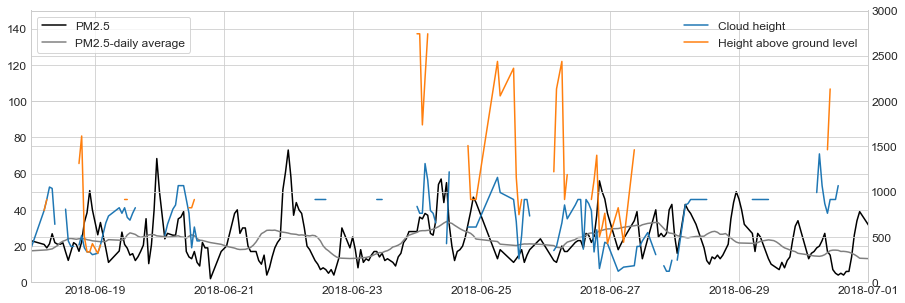

In [74]:
# let look another instance
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df.index, df.pm25, color='black', label='PM2.5')
ax.plot(df.index, df.pm25.rolling(window=24, center=True).mean(), color='gray', label='PM2.5-daily average')
ax.set_ylim(0, 150)

ax.legend(loc='upper left', frameon=True)
ax2 = ax.twinx()
ax2.plot(df.index, df.CLDHT, label='Cloud height')
ax2.plot(df.index, df.CIG, label='Height above ground level')
ax2.set_ylim(0, 3000)
ax2.legend()

ax.set_xlim(datetime.datetime(2018,6,18), datetime.datetime(2018,7,1))

- in the summer, the heights were more sporatic, some was set to `None` with a clear condition, and some of the points are in `missing` tag
- the concentration is also lower, in the range of 20-30 &mu;g/m<sup>3</sup>

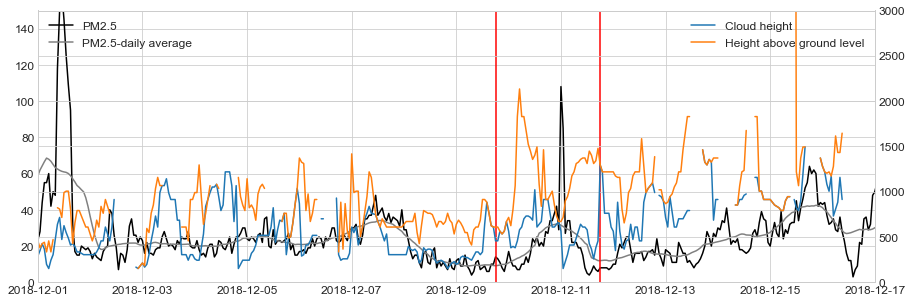

In [75]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df.index, df.pm25, color='black', label='PM2.5')
ax.plot(df.index, df.pm25.rolling(window=24, center=True).mean(), color='gray', label='PM2.5-daily average')
ax.set_ylim(0, 150)

ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(df.index, df.CLDHT, label='Cloud height')
ax2.plot(df.index, df.CIG, label='Height above ground level')
ax2.set_ylim(0, 3000)
ax2.legend(loc='upper right')
ax.set_xlim(datetime.datetime(2018,12,1), datetime.datetime(2018,12,17))
ax.axvline(x=datetime.datetime(2018,12,9,18), color='red')
ax.axvline(x=datetime.datetime(2018,12,11,18), color='red')

- in this window, another event that capture the inverse correlation of cloud height and PM<sub>2.5</sub> concentration



In [76]:
# import matplotlib.transforms as transforms

In [77]:
import matplotlib as mpl

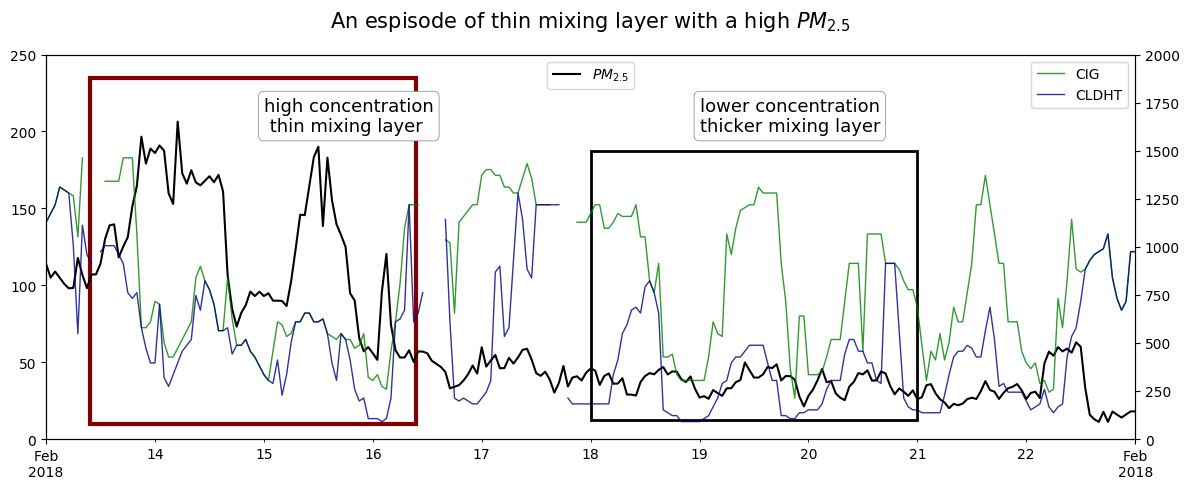

In [78]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df.index, df.pm25, color='black', label=r'$PM_{2.5}$')
ax.set_ylim(0, 250)
ax.legend(loc='upper center')


ax2 = ax.twinx()
ax2.plot(df.index, df.CIG, color='green', label='CIG', lw=1, alpha=0.8)
ax2.plot(df.index, df.CLDHT, color='navy', label='CLDHT', lw=1, alpha=0.8)
ax2.set_xlim(datetime.datetime(2018,2,13), datetime.datetime(2018,2,23))
ax2.set_ylim(0, 2000)
ax2.legend(loc='upper right')

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=0.5)
ax.annotate(s='high concentration\n thin mixing layer', xy=(0.2, 0.8),
            fontsize=13,
            bbox=bbox_props,
             xytext=(0.2,0.80),
            xycoords='axes fraction',
       )
ax.annotate(s='lower concentration\nthicker mixing layer', xy=(0.6, 0.8),
            fontsize=13,
            bbox=bbox_props,
             xytext=(0.6,0.80),
            xycoords='axes fraction',
       )

p = plt.Rectangle((0.04, .04), width=0.3, height=0.9, fill=False, color='maroon', lw=3)
p.set_transform(ax.transAxes)
p1 = plt.Rectangle((0.5, .05), width=0.3, height=0.7, fill=False, color='black', lw=2)
p1.set_transform(ax.transAxes)
p.set_clip_on(False)
ax.add_patch(p)
ax.add_patch(p1)
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.DayLocator())

ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%d'));
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h\n%Y'))
ax.set_title('An espisode of thin mixing layer with a high $PM_{2.5}$', y=1.05, fontsize=15)
fig.tight_layout()
fig.savefig('img/2020Jul_mixing_feb.png');


In [79]:
mpl.rcParams.update(mpl.rcParamsDefault)

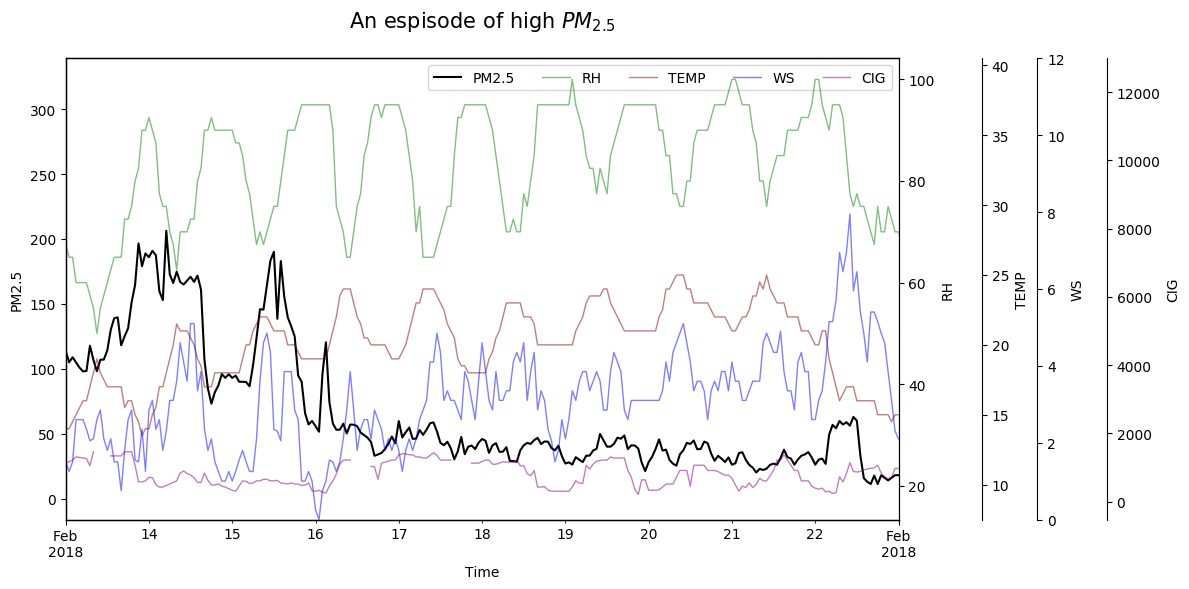

In [80]:
fig = plt.figure(figsize=(12,6))
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("PM2.5")
par1.set_ylabel("RH")
par2.set_ylabel("TEMP")
par3.set_ylabel("WS")
par4.set_ylabel("CIG")

p1, = host.plot(df.index, df.pm25, color='black',label="PM2.5")
p2, = par1.plot(df.index, df.RH, color='green', label="RH", alpha=0.5, lw=1)
p3, = par2.plot(df.index, df.TMP, color='maroon', label="TEMP", alpha=0.5, lw=1)
p4, = par3.plot(df.index, df.WS, color='blue', label="WS", alpha=0.5, lw=1)
p5, = par4.plot(df.index, df.CIG, color='purple', label="CIG", alpha=0.5, lw=1)

lns = [p1, p2, p3,p4, p5]
host.legend(handles=lns, loc='best', ncol=5)

par2.spines['right'].set_position(('outward', 60))      

par3.spines['right'].set_position(('outward', 100))
par3.set_ylim(0,12)
par4.spines['right'].set_position(('outward', 150)) 

host.set_xlim(datetime.datetime(2018,2,13), datetime.datetime(2018,2,23))

host.xaxis.set_major_locator(mpl.dates.MonthLocator())
host.xaxis.set_minor_locator(mpl.dates.DayLocator())

host.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%d'));
host.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h\n%Y'))
host.set_title('An espisode of high $PM_{2.5}$', y=1.05, fontsize=15)
fig.tight_layout()
fig.savefig('img/2020Jul_all_params.png');

## Temperature (TMP) and RH

- I have been used `corr()`, often without going to explain what else `cor()` can be used
- with `pandas` we three methods to calculate correlation, those are `pearson (default)`, `kendall`, and `spearman`

In [81]:
# using kendall 
df.corr(method='kendall')

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,pm25,RH,h,m
CIG,1.000000,0.313360,0.096671,-0.005355,0.043560,-0.033821,-0.184865,0.497624,-0.090715,-0.198426,0.024368,0.172048
VIS,0.313360,1.000000,0.308923,0.115910,-0.025996,0.221430,-0.102802,0.351972,-0.321040,-0.305167,-0.043266,0.190504
TMP,0.096671,0.308923,1.000000,0.601872,0.133937,0.059694,-0.223419,0.162392,-0.239646,-0.141600,-0.106566,0.172342
DEW,-0.005355,0.115910,0.601872,1.000000,0.057853,-0.001453,-0.218881,-0.081722,-0.324016,0.294478,0.012741,0.151405
WD,0.043560,-0.025996,0.133937,0.057853,1.000000,-0.250307,-0.036673,0.074495,0.072185,-0.087382,-0.041610,-0.009270
WS,-0.033821,0.221430,0.059694,-0.001453,-0.250307,1.000000,0.006225,-0.034795,-0.158496,-0.087386,-0.046700,-0.057510
CLDCR,-0.184865,-0.102802,-0.223419,-0.218881,-0.036673,0.006225,1.000000,0.018000,0.108613,-0.008383,0.005592,-0.123790
CLDHT,0.497624,0.351972,0.162392,-0.081722,0.074495,-0.034795,0.018000,1.000000,0.018913,-0.432984,0.027804,0.135996
pm25,-0.090715,-0.321040,-0.239646,-0.324016,0.072185,-0.158496,0.108613,0.018913,1.000000,-0.123304,-0.011468,-0.171548
RH,-0.198426,-0.305167,-0.141600,0.294478,-0.087382,-0.087386,-0.008383,-0.432984,-0.123304,1.000000,0.186342,0.036114


In [82]:
# let select a few columns
cols = ['RH', 'TMP', 'VIS']

In [83]:
spearman = dict()
for col in cols:
    spearman[col] = df.corr(method='spearman')['pm25'][col]
spearman

{'RH': -0.17829405965863518,
 'TMP': -0.3386498232001726,
 'VIS': -0.4480579176009144}

In [84]:
kendall = dict()
for col in cols:
    kendall[col] = df.corr(method='kendall')['pm25'][col]
kendall

{'RH': -0.12330443561688877,
 'TMP': -0.23964573988435875,
 'VIS': -0.32103981027468237}

In [85]:
pearson = dict()
for col in cols:
    pearson[col] = df.corr(method='pearson')['pm25'][col]
pearson

{'RH': -0.15560027174497226,
 'TMP': -0.2976330082643488,
 'VIS': -0.4127430609698673}

In [86]:
data = pd.DataFrame.from_records([pearson, kendall, spearman], index=['pearson', 'kendall', 'spearman'])
data

,RH,TMP,VIS
pearson,-0.155600,-0.297633,-0.412743
kendall,-0.123304,-0.239646,-0.321040
spearman,-0.178294,-0.338650,-0.448058


In [87]:
pos = np.arange(len(data))
pos

array([0, 1, 2])

In [88]:
plt.rcParams['hatch.color'] = 'black'

In [89]:
plt.style.use('seaborn-white')

In [90]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

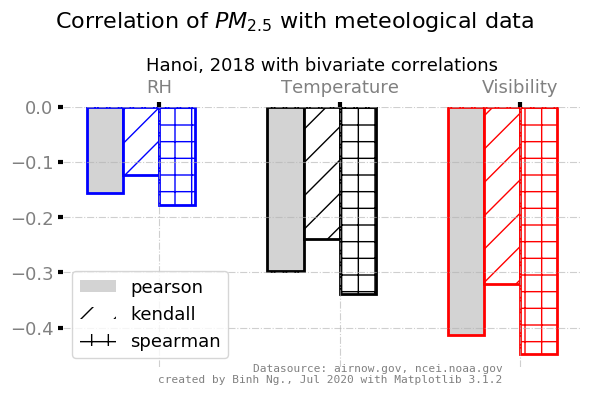

In [91]:
# plt.figure(figsize=(8,8))
fig, ax = plt.subplots(figsize=(6,4))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
width=0.2
ax.xaxis.tick_top()

ax1 = ax.bar(x=pos-width, height=data.loc['pearson'], width=width, color='lightgray')
ax2 = ax.bar(x=pos, height=data.loc['kendall'], width=width, color='white', hatch='/')
ax3 = ax.bar(x=pos+width, height=data.loc['spearman'], width=width, color='white', hatch='+')
# ax = plt.gca()
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(('RH', 'Temperature', 'Visibility'), fontsize=13)

ax.legend((ax1[0], ax2[0], ax3[0]), ('pearson', 'kendall', 'spearman'), fontsize=13, frameon=True)
# plt.bar(x=pos+width, height=data.loc['kendall'], width=0.4)
for b in [ax1, ax2, ax3]:
    b[1].set_linewidth(2)
    b[1].set_edgecolor('black')

    b[0].set_linewidth(2)
    b[0].set_edgecolor('blue')
    
    b[2].set_linewidth(2)
    b[2].set_edgecolor('red')
ax.autoscale_view()
ax.tick_params(labelcolor='gray', labelsize=13, width=3)
ax.grid(True, linestyle='-.', alpha=0.6)

ax.set_frame_on(True)
ax.patch.set_visible(False)
for sp in ax.spines.values():
    sp.set_visible(False)
# plt.ax([.1,.1,.8,.7])
plt.subplots_adjust(top=0.4)
plt.figtext(2,-0.5, 'Datasource: airnow.gov, ncei.noaa.gov\ncreated by Binh Ng., Jul 2020 with Matplotlib 3.1.2', transform=ax.transData, 
            family='monospace', color='gray', ha='right', fontsize=8)
ax.set_title('Hanoi, 2018 with bivariate correlations', fontsize=13)
plt.subplots_adjust(top=0.4)
plt.suptitle(r'Correlation of $PM_{2.5}$ with meteological data', fontsize=16)
plt.tight_layout(rect=(0,0.05,1, 0.9))
plt.savefig('img/2020Jul_corr_method.png')

**what we have here?**

- if you see some correlation, a question you should ask is which method was used? It would be fine if all correlation was carried out with the same method. 
- The `pearson` method is a safe choice because it is the average of the two. Knowing with method is used is important when one study indicated the correlation is higher or lower

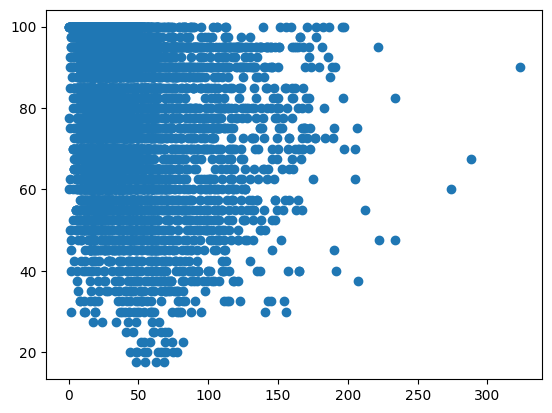

In [92]:
plt.scatter(df.pm25, df.RH)

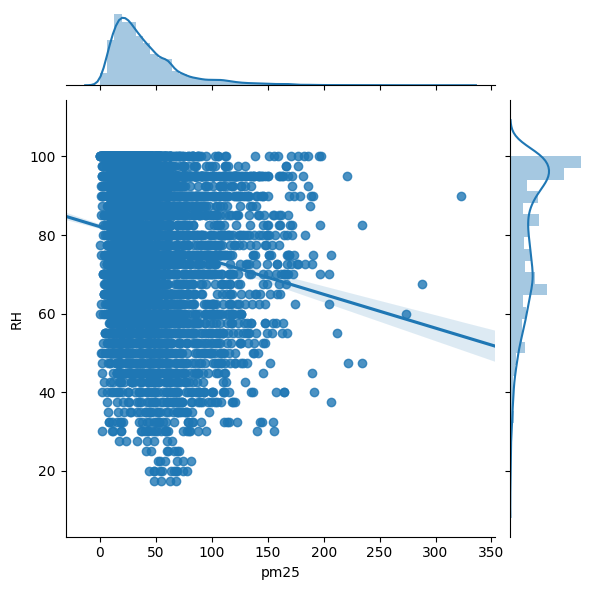

In [93]:
sns.jointplot(df.pm25, df.RH, kind='reg')

In [94]:
rhs = np.linspace(0,100,16)
rhs

array([  0.        ,   6.66666667,  13.33333333,  20.        ,
        26.66666667,  33.33333333,  40.        ,  46.66666667,
        53.33333333,  60.        ,  66.66666667,  73.33333333,
        80.        ,  86.66666667,  93.33333333, 100.        ])

In [95]:
labels = [f'{(rhs[i] + rhs[i+1])/2:.0f}' for i in (range(len(rhs)-1))]
labels

['3',
 '10',
 '17',
 '23',
 '30',
 '37',
 '43',
 '50',
 '57',
 '63',
 '70',
 '77',
 '83',
 '90',
 '97']

In [96]:
df['RHC'] = pd.cut(df['RH'], bins=rhs, labels=labels).astype('category')

In [97]:
dfs = df.groupby('RHC')

<ErrorbarContainer object of 3 artists>

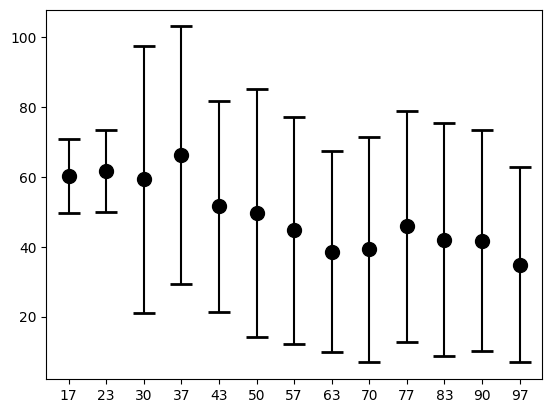

In [98]:
plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().pm25, yerr=dfs.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

Text(0.5, 0, 'RH, %')

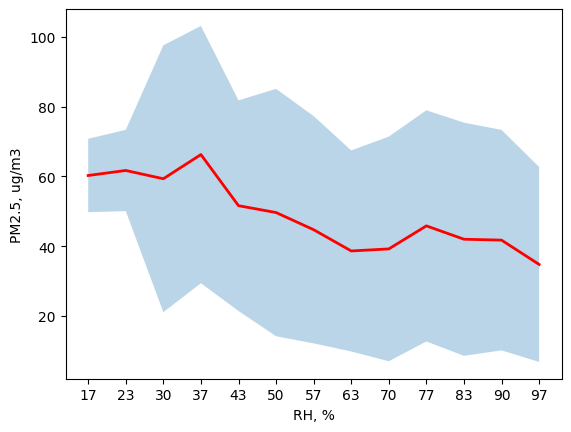

In [99]:
plt.plot(list(dfs.mean().index), dfs.mean().pm25, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().pm25 - dfs.std().pm25 , 
                 y2=dfs.mean().pm25 + dfs.std().pm25, alpha=0.3)
plt.ylabel('PM2.5, ug/m3')
plt.xlabel('RH, %')

In [100]:
df.TMP.describe()

count    7959.000000
mean       24.462935
std         5.519358
min         9.000000
25%        21.000000
50%        25.000000
75%        28.000000
max        39.000000
Name: TMP, dtype: float64

In [122]:
# let make a quick run with temperature
tmps = np.linspace(0,40,21)
labels = [f'{(tmps[i] + tmps[i+1])/2:.0f}' for i in (range(len(tmps)-1))]
df['TMPC'] = pd.cut(df['TMP'], bins=tmps, labels=labels).astype('category')

Text(0.5, 0, 'Temperature, $ ^\\circ C$')

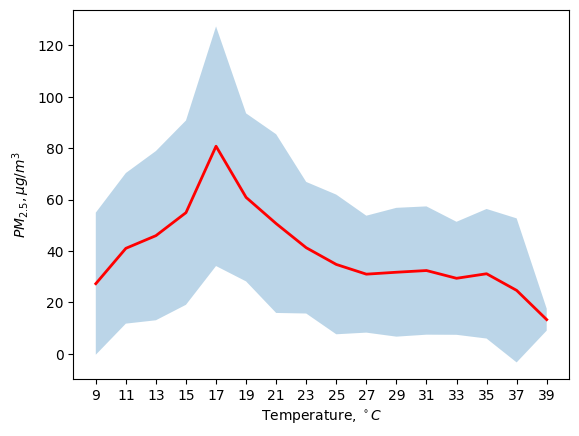

In [127]:
dfs = df.groupby('TMPC')
plt.plot(list(dfs.mean().index), dfs.mean().pm25, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().pm25 - dfs.std().pm25 , 
                 y2=dfs.mean().pm25 + dfs.std().pm25, alpha=0.3)
plt.ylabel('$PM_{2.5}, \mu g/m^3$')
plt.xlabel('Temperature, $ ^\circ C$')

- the trend is mixed. Higher concentrations of PM<sub>2.5</sub> were observed during a winter but not when it is at the lowest range. This would suggest the high concentration between the transition between a cold front and a hot front

## Wind direction

In [102]:
direction = np.linspace(0,360,5)
direction

array([  0.,  90., 180., 270., 360.])

In [103]:
labels = ['NE', 'SE', 'SW', 'NW']

In [104]:
df['WDC'] = pd.cut(df['WD'], bins=direction, labels=labels).astype('category')

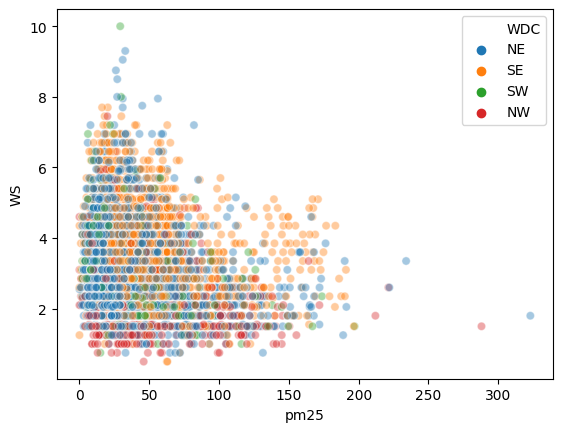

In [105]:
sns.scatterplot(data=df, x='pm25', y='WS', hue='WDC', alpha=0.4)

In [106]:
df.groupby('WDC').std()['pm25']

WDC
NE    30.924822
SE    28.985036
SW    29.321554
NW    33.651236
Name: pm25, dtype: float64

In [107]:
df.groupby('WDC').mean()['pm25']

WDC
NE    38.557232
SE    39.893007
SW    34.510490
NW    41.317012
Name: pm25, dtype: float64

In [108]:
dfd = df.groupby('WDC')

<ErrorbarContainer object of 3 artists>

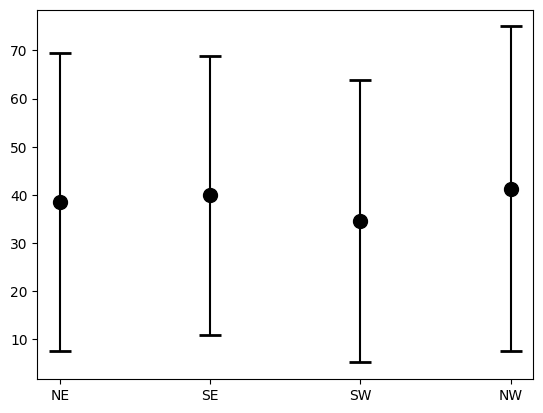

In [109]:
plt.errorbar(x=list(dfd.mean().index), y=dfd.mean().pm25, yerr=dfd.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

## Wind speeds

In [110]:
speeds = np.linspace(0,12,7)
speeds

array([ 0.,  2.,  4.,  6.,  8., 10., 12.])

In [111]:
labels = [f'{(speeds[i] + speeds[i+1])/2:.0f}' for i in (range(len(speeds)-1))]
labels

['1', '3', '5', '7', '9', '11']

In [112]:
df['WSC'] = pd.cut(df['WS'], bins=speeds, labels=labels).astype('category')

In [113]:
dfs = df.groupby('WSC')

<ErrorbarContainer object of 3 artists>

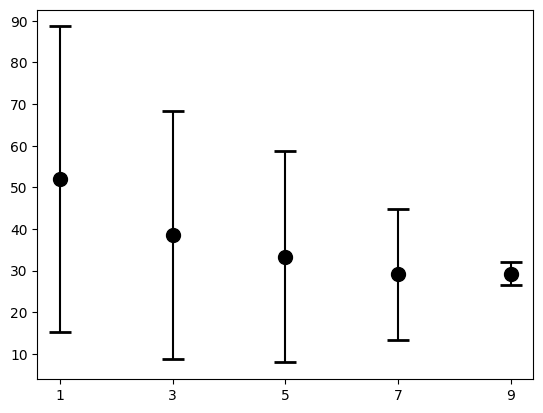

In [114]:
plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().pm25, yerr=dfs.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

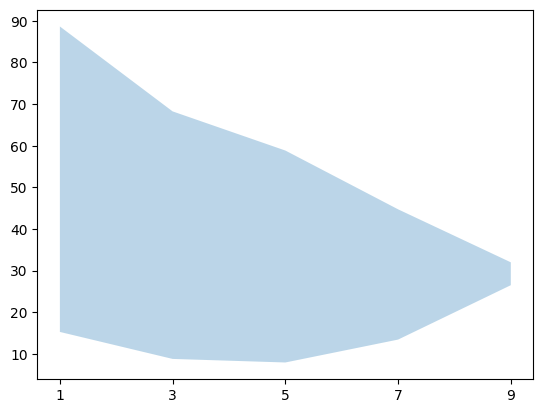

In [115]:
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().pm25 - dfs.std().pm25 , 
                 y2=dfs.mean().pm25 + dfs.std().pm25, alpha=0.3)

In [116]:
speeds = np.linspace(0,12,13)
labels = [f'{(speeds[i] + speeds[i+1])/2:.1f}' for i in (range(len(speeds)-1))]
labels

['0.5',
 '1.5',
 '2.5',
 '3.5',
 '4.5',
 '5.5',
 '6.5',
 '7.5',
 '8.5',
 '9.5',
 '10.5',
 '11.5']

In [117]:
df['WSC'] = pd.cut(df['WS'], bins=speeds, labels=labels).astype('category')

In [118]:
dfs = df.groupby('WSC')

In [119]:
df.corr().pm25.WS

-0.027791426871811013

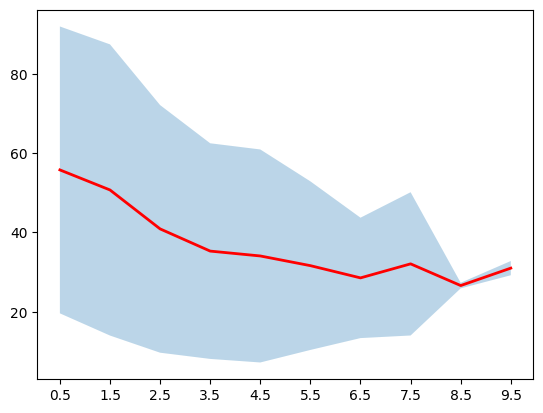

In [120]:
plt.plot(list(dfs.mean().index), dfs.mean().pm25, lw=2, color='r')
plt.fill_between(x=list(dfs.mean().index), y1=dfs.mean().pm25 - dfs.std().pm25 , 
                 y2=dfs.mean().pm25 + dfs.std().pm25, alpha=0.3)

<ErrorbarContainer object of 3 artists>

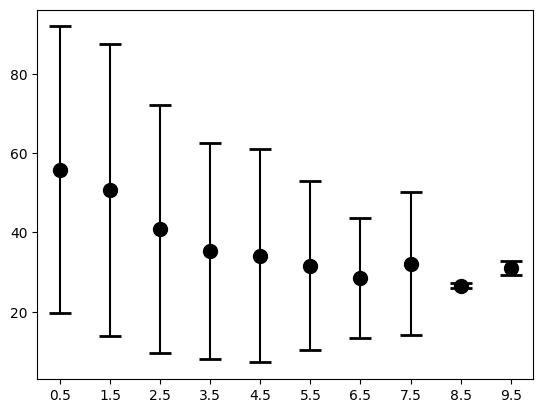

In [121]:
plt.errorbar(x=list(dfs.mean().index), y=dfs.mean().pm25, yerr=dfs.std().pm25,
            fmt='o', capsize=8, capthick=2, color='black',
            marker='o', markersize=10)

# Concluding notes

- I might introduce the topic more complicated than we started out, but I would take the complexity of PM<sub>2.5</sub> with meteorological inputs as the matter of fact. We need to do a better job the shed some light (or any light) on it
- I have not mentioned the emission source or the formation rate, which is why the PM<sub>2.5</sub> is out there in the first place
- Once PM<sub>2.5</sub> formed and with precussors, wind speed, temperature, the thickness of mixing have a fair share to dictate which how much PM<sub>2.5</sub> is stored the ground (and so we measured it)
- A higher temperature (such as during the summer month) seems to be dominant factor with a lowerer concentration. This could be explained by a strong turbulent (and unstable mixing layer) so that the polluted air nearby the ground constantly moved upward, and replaced a cooler (and cleaner) air moving downward
- During winter time, with a higher windspeed or with a thicker mixing layer were favored to lower the PM<sub>2.5</sub> concentration
- Stagnant (or stable) air layer in ground level is a favorable condition to store and accumulate PM<sub>2.5</sub> which is bad for lung and respiratory tract.